# Análise dos dados

Importação da biblioteca necessária

In [0]:
import pandas as pd

Importação dos dados nos repositórios do github

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

Análise dos dados de "filmes"

In [3]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Análise dos dados de "avaliacoes"

In [4]:
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Mudança para português das colunas de "filmes" e "avaliacoes"

In [5]:
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Calcular as notas médias de cada filme e explorar as primeiras 5 médias

In [7]:
#Manter a organização de acordo os ids de cada filme
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
#Visualizar as 5 primeiras médias
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Adicionar uma nova coluna com a média de cada filme para a tabela em uma nova variável 

In [8]:
#Adicionar a tabela a nova coluna com as médias
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Gráfico de barras com os gêneros dos filmes

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


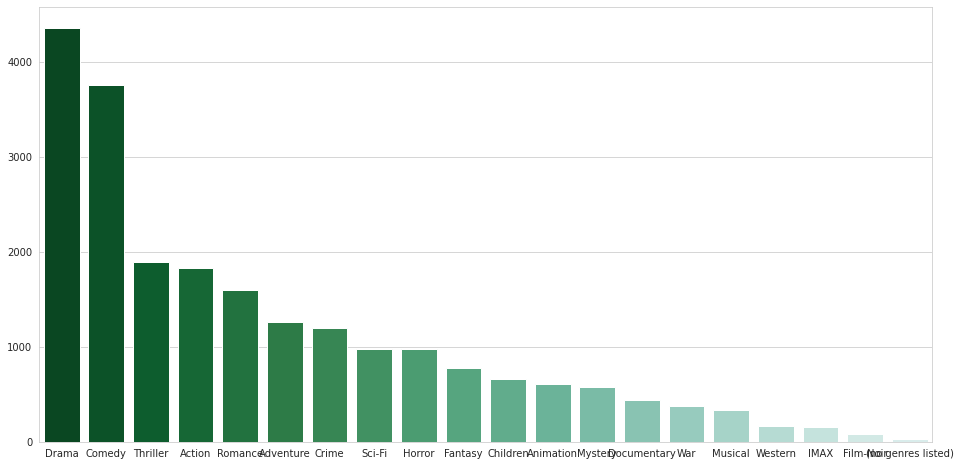

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Como a média é uma análise de dados que esconde muita informação, avaliar como estão distribuídas as avaliações de maneira a chegar nessa média

Filme 1 (Toy Story)

3.9209302325581397


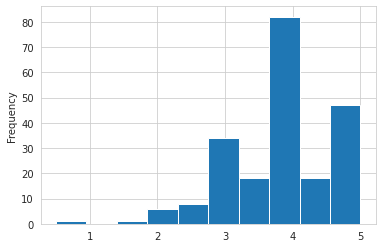

In [10]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist');

Filme 2 (Jumanji)

3.4318181818181817


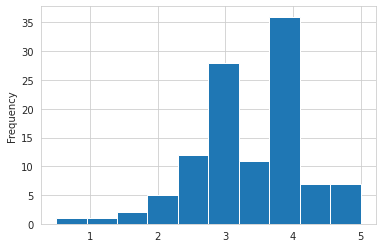

In [11]:
notas_do_filme_2 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind='hist');

Para este caso deu para perceber que mais pessoas avaliaram muito bem o filme do Toy story(gostaram) enquanto mais pessoas declararam o filme 2 (Jumanji) como razoável

Plotar o filme e suas informações

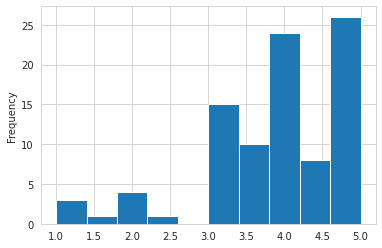

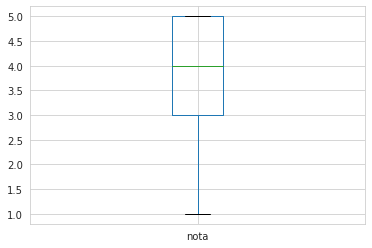

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [12]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

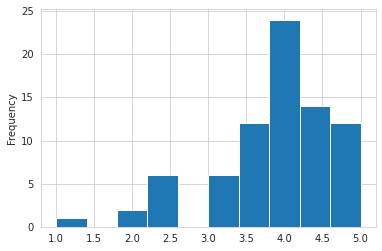

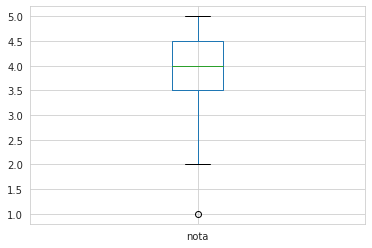

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [13]:
plot_filme(46578)

Visualizar como estão distribuídas as notas dos seguintes filmes

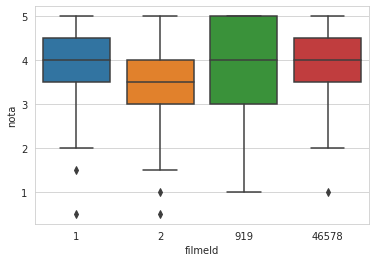

In [14]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

# Desafios

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

Visualizar para 30º de rotação

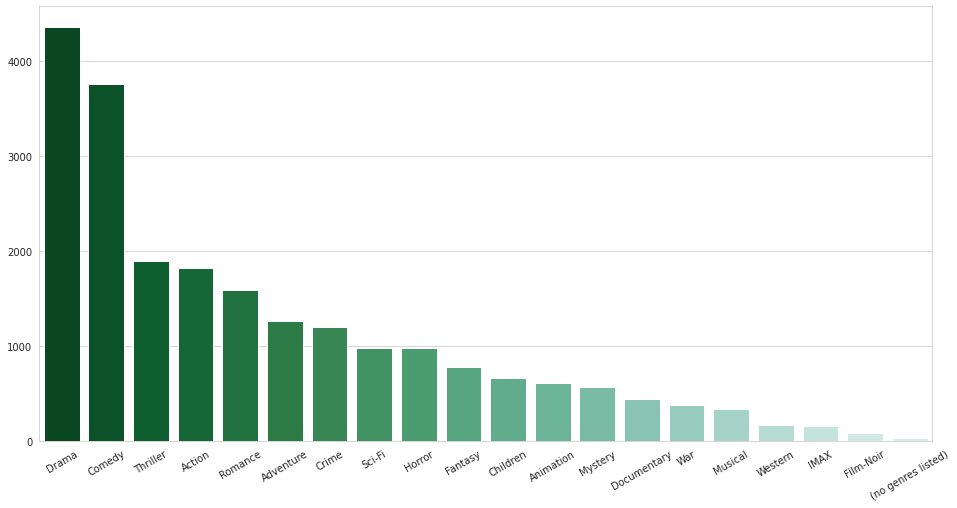

In [15]:
#Configurar as ticks x para 30º
plt.figure(figsize=(16,8))
bar_graph = sns.barplot(
              x=filmes_por_genero.index,
              y=filmes_por_genero.values,
              palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4),
             )
bar_graph.set_xticklabels(bar_graph.get_xticklabels(), rotation=30)
plt.show()

Visualizar para 45º de rotação

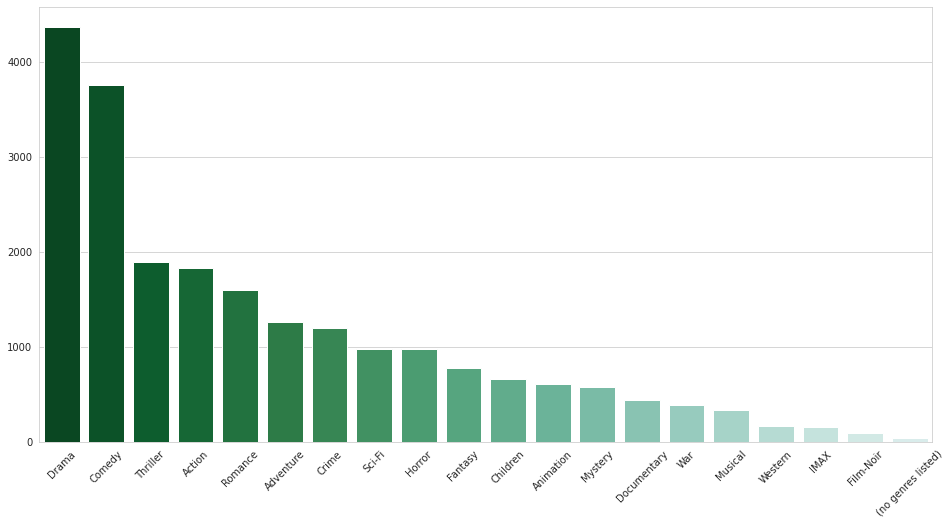

In [16]:
#Configurar as ticks x para 45º
plt.figure(figsize=(16,8))
bar_graph = sns.barplot(
              x=filmes_por_genero.index,
              y=filmes_por_genero.values,
              palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4),
             )
bar_graph.set_xticklabels(bar_graph.get_xticklabels(), rotation=45)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

Para encontrar os filmes com médias próximas, como não foi determinado quão próximo deve ser, determinar de maneira a critério

    filmeId  ...      nota
9        10  ...  3.496212
20       21  ...  3.494382
25       26  ...  3.500000
47       52  ...  3.464286
62       70  ...  3.509091

[5 rows x 4 columns]


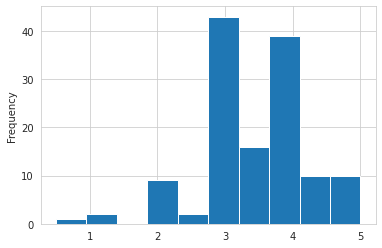

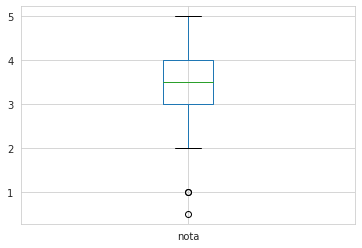

count    132.000000
mean       3.496212
std        0.859381
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [17]:
#Média a critério
Media = 3.5
#Desvio para selecionar os filmes com as médias próximas
desvio = 0.05
#Selecionar os filmes com médias próximas
filmes_com_media_proxima = filmes_com_media.query("(nota >= (@Media - @desvio)) and (nota <= (@Media + @desvio))")
#Visualizar alguns filmes com esses intervalos
print(filmes_com_media_proxima.head())
#pegar o Id de cada filme
filmes_com_media_proxima = filmes_com_media_proxima["filmeId"]
#Pegar um valor dos filmes selecionados
n = filmes_com_media_proxima.values[0]
plot_filme(n)

Visualizar para outro filme

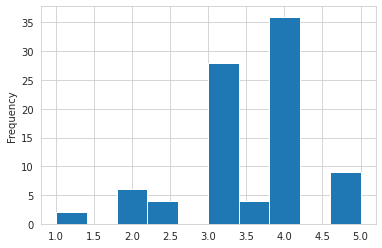

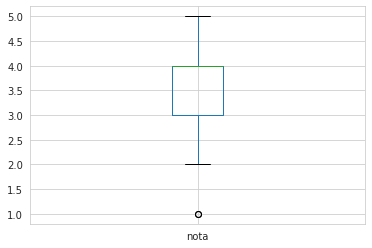

count    89.000000
mean      3.494382
std       0.867646
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: nota, dtype: float64

In [18]:
n = filmes_com_media_proxima.values[1]
plot_filme(n)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

Primeiramente é necessário voltar a nossa tabela de avaliações para então verificar quais filmes tiveram mais fotos

In [19]:
#Visualizar como é organizada a tabela
print(avaliacoes.head())

   usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931


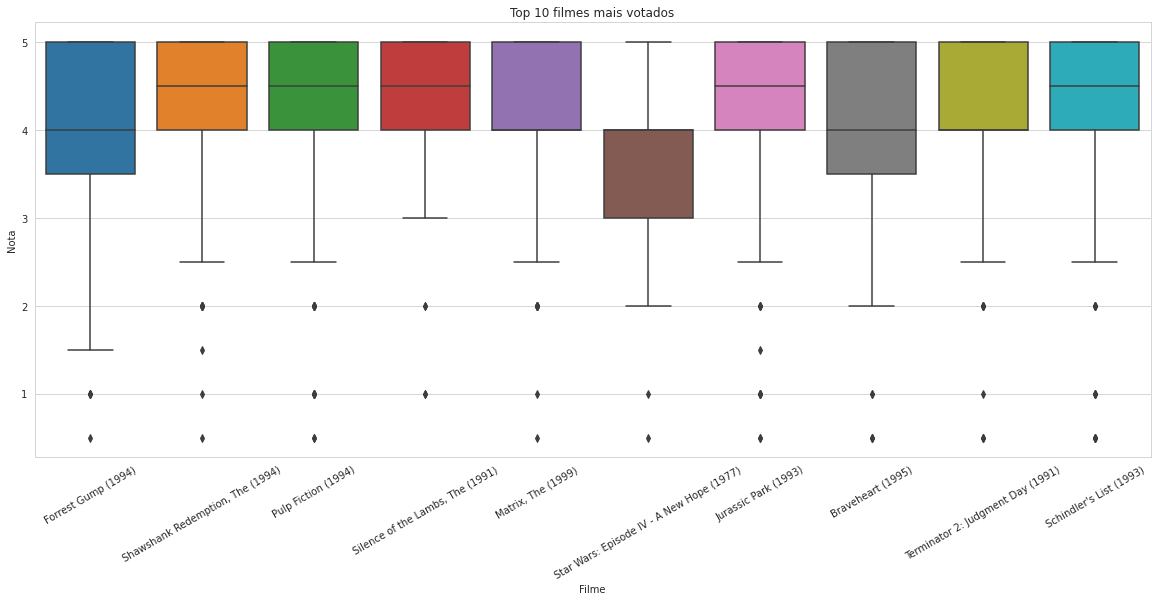

In [20]:
#Agrupar os dados pelo Id do filme e então organizar numa nova tabela
Votos_dos_filmes = avaliacoes.groupby("filmeId").size()
Votos_dos_filmes.name = "TotalVotos"
filmes_com_media_e_total_votos = filmes_com_media.join(Votos_dos_filmes, on="filmeId")
#Pegar os 10 primeiros filmes
top10_mais_votados = filmes_com_media_e_total_votos.sort_values("TotalVotos", ascending=False)[:10]
#Separar os titulos para plotar no boxplot e organizar numa lista para maior facilidade no eixo
top10_mais_votados_titulo = list(top10_mais_votados["titulo"])
top10_mais_votados_filmeid = list(top10_mais_votados["filmeId"])
#Tamanho do boxplot
plt.figure(figsize=(20,8))
#Pegar referente ao id primeiro por que na tabela avaliações não há o titulo de cada
ax = sns.boxplot(data=avaliacoes.query("filmeId in @top10_mais_votados_filmeid"), x="filmeId",y="nota")
#Agora mudar para plotar com relação ao titulo(ticks)
ax.set_xticklabels(top10_mais_votados_titulo)
#Título do boxplot
plt.title("Top 10 filmes mais votados")
#Eixo x
ax.set_xlabel("Filme")
#Eixo y
ax.set_ylabel("Nota")
#Rotacionar os ticks do eixo x
plt.xticks(rotation=30)
plt.show()

Visualizar a quantidade de votos dos 10 primeiros

In [21]:
top10_mais_votados

,filmeId,titulo,generos,nota,TotalVotos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.750000,238.0
97,110,Braveheart (1995),Action|Drama|War,4.031646,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.970982,224.0
461,527,Schindler's List (1993),Drama|War,4.225000,220.0


Verificar as 10 maiores médias dos filmes para ver se há relação com o número de votos

In [22]:
filmes_com_media_e_total_votos.sort_values("nota", ascending=False).head(10)

,filmeId,titulo,generos,nota,TotalVotos
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0,1.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0,1.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0,1.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0,1.0
9122,145994,Formula of Love (1984),Comedy,5.0,1.0


Dado que os 10 filmes mais avaliados não são os que mais receberam votos, mas justamente ao contrário, os que menos receberam, não se pode concluir que os filmes com mais avaliação não são os melhores, por que não obteram um grande número de avaliações

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

[Text(0, 0, 'Toy Story (1995)'),
 Text(0, 0, 'Jumanji (1995)'),
 Text(0, 0, 'Grumpier Old Men (1995)'),
 Text(0, 0, 'Waiting to Exhale (1995)')]

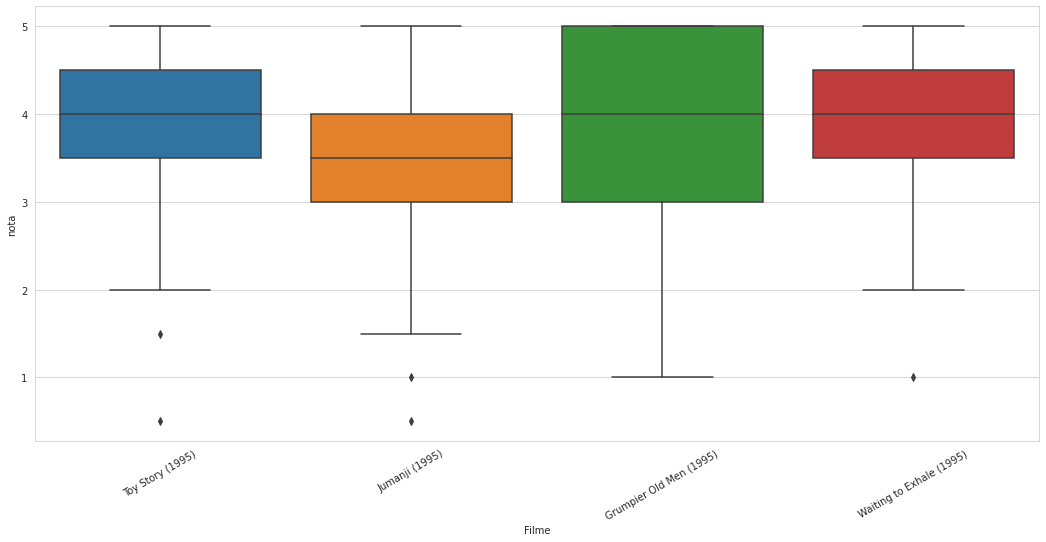

In [23]:
#Determinar tamanho da figura e o boxplot
plt.figure(figsize=(18, 8))
boxplt_titulos = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"),
                x ="filmeId",
                y="nota",
                )

#É preciso verificar quais ids estão presentes para o conjunto de filmes plotados e assumir eles como valores
boxplt_titulos.set(xticklabels=filmes_com_media[filmes_com_media['filmeId'].isin(filmes_com_media['filmeId'])].titulo)
#Mudar o nome da label no eixo x, pois agora está em relação a titulos
boxplt_titulos.set_xlabel("Filme")
#Pegar esses valores valores atualizados e configurar no eixo x
boxplt_titulos.set_xticklabels(boxplt_titulos.get_xticklabels(), rotation= 30)

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [24]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Calcular a mediana de todos os filmes e visualizar alguns dados

In [25]:
mediana_filmes = avaliacoes.groupby('filmeId')["nota"].median()
#Os 10 primeiros
mediana_filmes.head(10)

filmeId
1     4.0
2     3.5
3     3.0
4     3.0
5     3.0
6     4.0
7     3.0
8     3.0
9     3.0
10    3.5
Name: nota, dtype: float64

Juntar a mediana com a tabela com as notas para obter uma análise mais concreta desses dados

In [26]:
#Nome da coluna
mediana_filmes.name = "mediana"
#Tabela com a mediana inserida
filmes_com_media_total_votos_e_mediana = filmes_com_media_e_total_votos.join(mediana_filmes,on="filmeId")
#Mudar o nome da coluna nota para uma análise melhor
filmes_com_media_total_votos_e_mediana  = filmes_com_media_total_votos_e_mediana.rename(columns={"nota": "media"})
#Verificar a nova tabela com a mediana dos 10 primeiros filmes
filmes_com_media_total_votos_e_mediana.head(10)

,filmeId,titulo,generos,media,TotalVotos,mediana
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,3.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102.0,4.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,54.0,3.0
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8.0,3.0
8,9,Sudden Death (1995),Action,3.125000,16.0,3.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132.0,3.5


Calcular a moda dos filmes

In [27]:
#Já agrupar junto com o nome moda para a coluna
moda_filmes = avaliacoes.groupby("filmeId").agg(pd.Series.mode).rename(columns={"nota": "moda"})
#Acrescentar a nova coluna a tabela com os dados dos filmes
filmes_com_media_total_votos_mediana_e_moda = filmes_com_media_total_votos_e_mediana.join(moda_filmes, on="filmeId")
#Visualizar a nova tabela com a moda dos 10 primeiros filmes
filmes_com_media_total_votos_mediana_e_moda.head(10)

,filmeId,titulo,generos,media,TotalVotos,mediana,moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,4.0,4
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,3.5,4
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,3.0,3
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,3.0,3
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,3.0,3
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102.0,4.0,4
6,7,Sabrina (1995),Comedy|Romance,3.185185,54.0,3.0,3
7,8,Tom and Huck (1995),Adventure|Children,2.875000,8.0,3.0,3
8,9,Sudden Death (1995),Action,3.125000,16.0,3.0,3
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,132.0,3.5,3


Análise dos dados para as notas especificadas

In [0]:
def AnaliseEstatistica(filmeId):
  filme = filmes_com_media_total_votos_mediana_e_moda.query("filmeId == @filmeId")
  titulo = filme.iloc[0,1]
  media = filme.iloc[0,3]
  mediana = filme.iloc[0,5]
  moda = filme.iloc[0,6]
  print("================================")
  print("Filme:", titulo)
  print()
  print("Média:", media)
  print("Mediana:", mediana)
  print("Moda:", moda)
  print("============================")
  print()

Selecionar alguns Ids

In [29]:
filmes_com_media_total_votos_mediana_e_moda.head(700)

,filmeId,titulo,generos,media,TotalVotos,mediana,moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0,4.0,4
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0,3.5,4
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0,3.0,3
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0,3.0,3
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0,3.0,3
...,...,...,...,...,...,...,...
695,913,"Maltese Falcon, The (1941)",Film-Noir|Mystery,4.170455,44.0,4.0,4
696,914,My Fair Lady (1964),Comedy|Drama|Musical|Romance,4.042857,35.0,4.0,4
697,915,Sabrina (1954),Comedy|Romance,3.766667,30.0,4.0,4
698,916,Roman Holiday (1953),Comedy|Drama|Romance,4.057692,26.0,4.0,"[4.0, 5.0]"


In [30]:
AnaliseEstatistica(1)
AnaliseEstatistica(3)
AnaliseEstatistica(107)
AnaliseEstatistica(237)
AnaliseEstatistica(5)
AnaliseEstatistica(916)

Filme: Toy Story (1995)

Média: 3.9209302325581397
Mediana: 4.0
Moda: 4.0

Filme: Grumpier Old Men (1995)

Média: 3.2596153846153846
Mediana: 3.0
Moda: 3.0

Filme: Muppet Treasure Island (1996)

Média: 3.326923076923077
Mediana: 3.0
Moda: 3.0

Filme: Forget Paris (1995)

Média: 3.340909090909091
Mediana: 3.25
Moda: [3. 4.]

Filme: Father of the Bride Part II (1995)

Média: 3.0714285714285716
Mediana: 3.0
Moda: 3.0

Filme: Roman Holiday (1953)

Média: 4.0576923076923075
Mediana: 4.0
Moda: [4. 5.]



## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


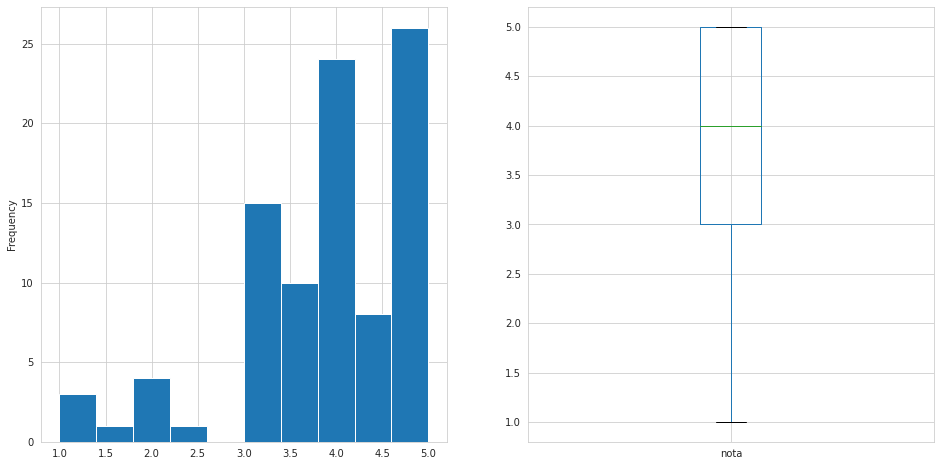

In [31]:
def plots(filmeId):
  #Pegar a média do filme
  notas_do_filme = avaliacoes.query(f"filmeId=={filmeId}")["nota"]
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
  # plt.figure(figsize=(16,8))
  notas_do_filme.plot(kind='hist', ax=ax1)
  notas_do_filme.plot(kind='box', ax=ax2)
  plt.show()

#Filme demonstração para como ficará a plotagem
plots(919)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

Visualizar como estão inseridos os anos na tabela

In [32]:
filmes.head(10)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Juntar em uma nova tabela com a média e o ano de lançamento e já calcular a média das notas por ano de lançamento

In [33]:
#Criação da tabela, salvando os VALORES da tabela filmes_com_media e não o ponto de referência
filmes_com_media_e_ano_lancamento = filmes_com_media.copy()
# filmes_com_media_e_ano_lancamento = filmes_com_media.join(anos_lancamento, on="filmeId")
filmes_com_media_e_ano_lancamento["anoLancamento"] = filmes_com_media["titulo"].str.extract("\((\d{4})\)")
#Visualizar os 10 primeiros filmes
filmes_com_media_e_ano_lancamento.head(10)

,filmeId,titulo,generos,nota,anoLancamento
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995
5,6,Heat (1995),Action|Crime|Thriller,3.946078,1995
6,7,Sabrina (1995),Comedy|Romance,3.185185,1995
7,8,Tom and Huck (1995),Adventure|Children,2.875000,1995
8,9,Sudden Death (1995),Action,3.125000,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,1995


Agrupar a coluna com a média

In [34]:
#Agrupar a média por ano
media_por_ano = filmes_com_media_e_ano_lancamento.groupby("anoLancamento")['nota'].mean()
#Visualizar a média de notas por ano
media_por_ano.head(10)

anoLancamento
1902    3.500000
1903    2.500000
1908    4.000000
1915    2.000000
1916    3.562500
1917    4.500000
1919    2.000000
1920    3.678571
1921    4.100000
1922    3.531250
Name: nota, dtype: float64

Criar o gráfico para acompanhar a média ao longo dos anos

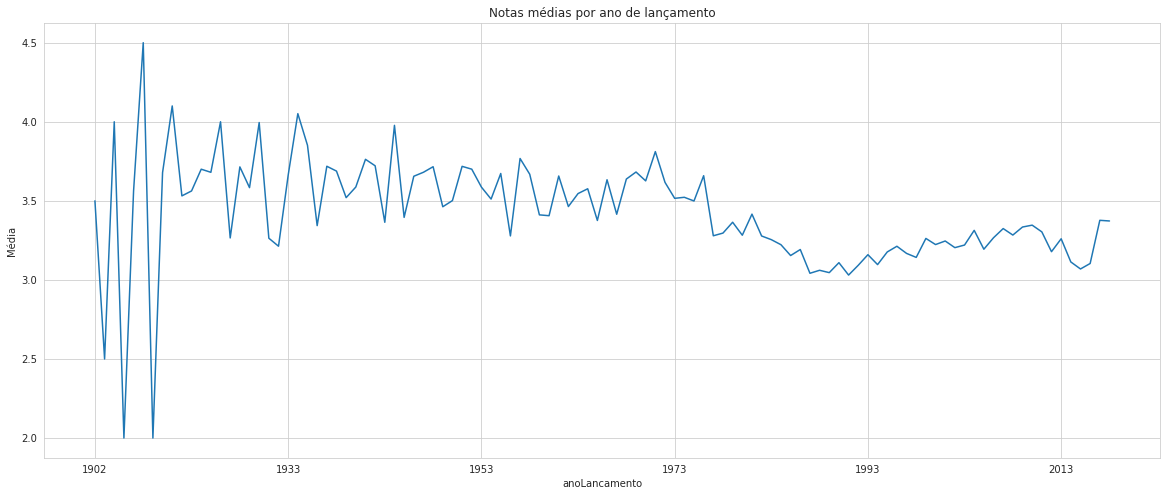

In [35]:
#Tamanho do gráfico
plt.figure(figsize=(20,8))
#Plotar os resultados
plt.ylabel("Média")
media_por_ano.plot(title="Notas médias por ano de lançamento");